<a href="https://colab.research.google.com/github/Kaua-Rbs/Deep-Learning-From-A-To-Z-With-Pytorch-And-Python/blob/main/Project_10_1_Global_Sales_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 10.1: Global Sales Regression

##Importing Libraries

In [4]:
import pandas as pd
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
torch.__version__

'2.3.0+cu121'

##Database

In [5]:
torch.manual_seed(123)

In [6]:
base = pd.read_csv('games.csv')

In [7]:
base.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
base.shape

(16719, 16)

<Axes: >

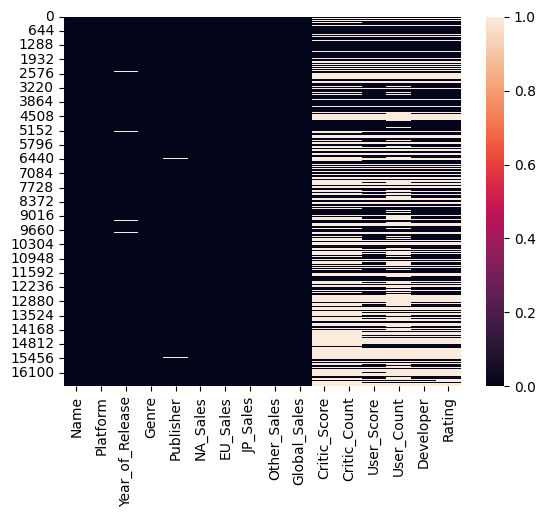

In [9]:
sns.heatmap(base.isnull())

In [10]:
base.loc[base['NA_Sales'] > 1]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,NCAA Football 13,X360,2012.0,Action,Electronic Arts,1.02,0.00,0.00,0.07,1.09,76.0,20.0,5.5,65.0,EA Tiburon,E
1901,Joust,2600,1982.0,Platform,Atari,1.01,0.06,0.00,0.01,1.08,NaN,NaN,NaN,NaN,NaN,NaN
1949,NFL Quarterback Club 98,N64,1997.0,Sports,Acclaim Entertainment,1.01,0.05,0.00,0.01,1.06,NaN,NaN,NaN,NaN,NaN,NaN
1950,NFL Blitz,N64,1998.0,Sports,Midway Games,1.02,0.04,0.00,0.01,1.06,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
base = base.loc[base['NA_Sales'] > 1]

In [12]:
base.loc[base['EU_Sales'] > 1]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,Mario Strikers Charged,Wii,2007.0,Sports,Nintendo,1.05,1.05,0.24,0.24,2.58,79.0,47.0,8,124.0,Next Level Games,E10+
603,Ghostbusters: The Video Game (DS Version),X360,2009.0,Action,Take-Two Interactive,1.04,1.22,0.03,0.27,2.56,NaN,NaN,NaN,NaN,NaN,NaN
610,Crazy Taxi,PS2,2001.0,Racing,Acclaim Entertainment,1.13,1.12,0.06,0.22,2.52,80.0,15.0,7.9,46.0,Acclaim Studios Cheltenham,T
624,Tomb Raider: The Last Revelation,PS,1998.0,Action,Eidos Interactive,1.15,1.14,0.06,0.13,2.48,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
base = base.loc[base['EU_Sales'] > 1]

In [14]:
base = base.drop('Name', axis=1)

In [15]:
base = base.drop('NA_Sales', axis=1)
base = base.drop('EU_Sales', axis=1)
base = base.drop('JP_Sales', axis=1)
base = base.drop('Other_Sales', axis=1)

In [16]:
base.shape

(355, 11)

In [17]:
base = base.drop('Developer', axis=1)

<Axes: >

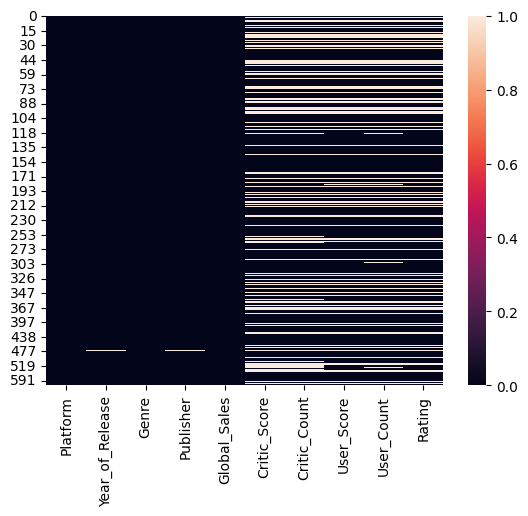

In [18]:
sns.heatmap(base.isnull())

In [19]:
base = base.dropna(axis=0)

<Axes: >

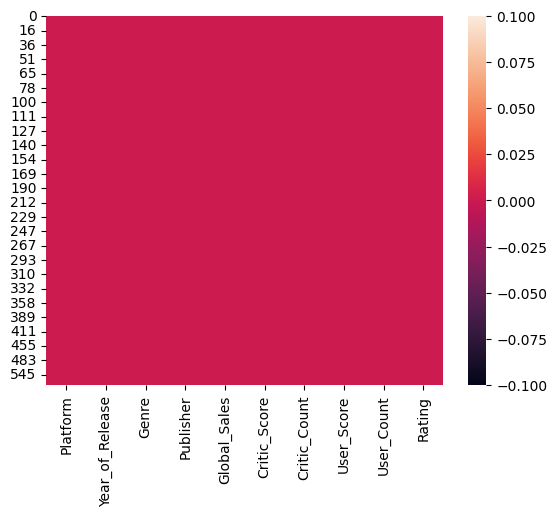

In [20]:
sns.heatmap(base.isnull())

In [21]:
base.head()

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii,2006.0,Sports,Nintendo,82.53,76.0,51.0,8,322.0,E
2,Wii,2008.0,Racing,Nintendo,35.52,82.0,73.0,8.3,709.0,E
3,Wii,2009.0,Sports,Nintendo,32.77,80.0,73.0,8,192.0,E
6,DS,2006.0,Platform,Nintendo,29.80,89.0,65.0,8.5,431.0,E
7,Wii,2006.0,Misc,Nintendo,28.92,58.0,41.0,6.6,129.0,E


In [22]:
previsores = base.iloc[:, [0, 1, 2, 3, 5, 6, 7, 8, 9]].values
vendas = base.iloc[:, 4].values

In [23]:
previsores

array([['Wii', 2006.0, 'Sports', ..., '8', 322.0, 'E'],
       ['Wii', 2008.0, 'Racing', ..., '8.3', 709.0, 'E'],
       ['Wii', 2009.0, 'Sports', ..., '8', 192.0, 'E'],
       ...,
       ['Wii', 2007.0, 'Sports', ..., '8', 124.0, 'E10+'],
       ['PS2', 2001.0, 'Racing', ..., '7.9', 46.0, 'T'],
       ['PS2', 2003.0, 'Simulation', ..., '8.4', 42.0, 'T']], dtype=object)

In [24]:
vendas

array([82.53, 35.52, 32.77, 29.8 , 28.92, 28.32, 23.21, 22.7 , 21.81,
       21.79, 21.04, 20.15, 16.27, 16.15, 15.29, 14.98, 14.73, 14.61,
       13.79, 13.67, 13.47, 13.32, 13.1 , 12.84, 12.66, 12.63, 12.61,
       12.13, 12.12, 11.35, 11.01, 10.95, 10.81, 10.7 , 10.6 , 10.5 ,
       10.25, 10.12,  9.9 ,  9.86,  9.72,  9.71,  9.49,  9.44,  9.36,
        9.31,  9.16,  8.91,  8.79,  8.57,  8.49,  8.38,  8.27,  8.16,
        8.05,  7.86,  7.72,  7.69,  7.66,  7.51,  7.38,  7.32,  7.2 ,
        7.2 ,  7.17,  7.16,  7.16,  7.15,  7.13,  7.09,  7.07,  6.9 ,
        6.83,  6.76,  6.75,  6.74,  6.68,  6.66,  6.62,  6.49,  6.45,
        6.44,  6.43,  6.41,  6.41,  6.4 ,  6.34,  6.32,  6.31,  6.27,
        6.21,  6.19,  6.09,  6.05,  6.03,  5.99,  5.87,  5.82,  5.82,
        5.74,  5.64,  5.64,  5.63,  5.55,  5.54,  5.49,  5.49,  5.48,
        5.48,  5.47,  5.42,  5.39,  5.38,  5.33,  5.29,  5.29,  5.27,
        5.26,  5.22,  5.19,  5.16,  5.14,  5.13,  5.1 ,  5.09,  5.08,
        5.05,  5.03,

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(),[0, 2, 3, 8])], remainder='passthrough')
previsores = onehotencoder.fit_transform(previsores).toarray()

In [26]:
previsores.shape

(258, 61)

In [27]:
#61 -> 1
#(61+1)/2 = 31
#61 -> 31 -> 31 -> 1
class regressor_torch(nn.Module):
  def __init__(self):
    super().__init__()
    self.dense0 = nn.Linear(61, 31)
    self.dense1 = nn.Linear(31,31)
    self.activation = nn.Sigmoid()
    self.output = nn.Linear(31,1)

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation(X)
    X = self.dense1(X)
    X = self.activation(X)
    X = self.output(X)
    return X

In [28]:
regressor = regressor_torch()

In [29]:
criterion = nn.MSELoss()
optimizer = optim.Adam(regressor.parameters())

In [30]:
previsores = torch.tensor(previsores, dtype=torch.float)
vendas = torch.tensor(vendas, dtype=torch.float)

In [31]:
dataset = torch.utils.data.TensorDataset(previsores, vendas)
train_loader = torch.utils.data.DataLoader(dataset, batch_size = 10, shuffle = True)

In [32]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [33]:
regressor.to(device)

regressor_torch(
  (dense0): Linear(in_features=61, out_features=31, bias=True)
  (dense1): Linear(in_features=31, out_features=31, bias=True)
  (activation): Sigmoid()
  (output): Linear(in_features=31, out_features=1, bias=True)
)

In [35]:
for epoch in range(2000):
  running_loss = 0.

  for i, data in enumerate(train_loader):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()

    outputs = regressor(inputs)

    mse = F.mse_loss(outputs, labels).item()

    loss = criterion(outputs, labels)
    loss.backward()

    optimizer.step()

    loss = loss.item()
    running_loss += loss * len(inputs)

    print('\rÉpoca {:4d} - Loop {:3d} de {:3d}: erro médio {:6.4f} - custo {:6.4f}'.format(epoch + 1,
                      i + 1,
                      len(train_loader),
                      loss,
                      loss), end = '\r')

print('ÉPOCA {:4d} finalizada: erro médio {:6.4f} - custo médio {:6.4f}         '.format(epoch + 1,
         running_loss/len(dataset),
         running_loss/len(dataset)))

<ipython-input-35-61b4c650099d>:12: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mse = F.mse_loss(outputs, labels).item()
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-35-61b4c650099d>:12: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mse = F.mse_loss(outputs, labels).item()
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: U

ÉPOCA 2000 finalizada: erro médio 48.5458 - custo médio 48.5458         


In [36]:
regressor.eval()

regressor_torch(
  (dense0): Linear(in_features=61, out_features=31, bias=True)
  (dense1): Linear(in_features=31, out_features=31, bias=True)
  (activation): Sigmoid()
  (output): Linear(in_features=31, out_features=1, bias=True)
)

In [37]:
previsores = previsores.to(device)
previsoes = regressor.forward(previsores)

In [38]:
previsoes

tensor([[6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9552],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6.9554],
        [6

In [39]:
previsoes = previsoes.cpu().detach().numpy()

In [40]:
previsoes

array([[6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.95518  ],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],
       [6.9554424],


In [41]:
previsoes.mean(axis = 0)

array([6.9554377], dtype=float32)

In [42]:
vendas.mean(axis = 0)

tensor(6.9264)

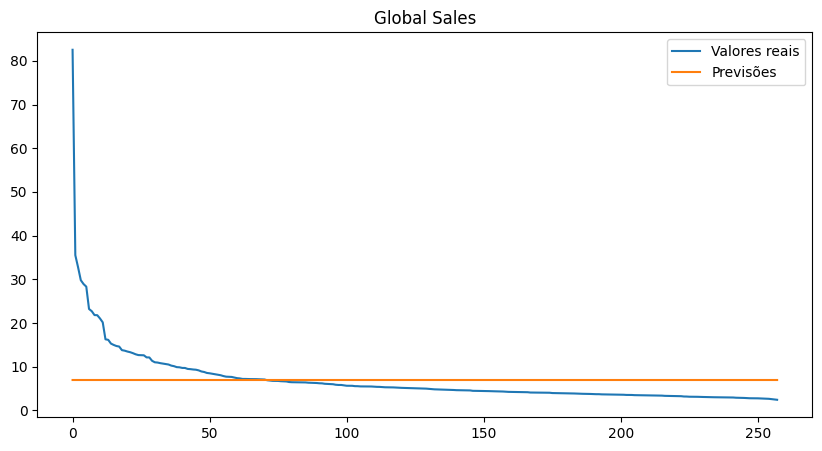

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(vendas, label='Valores reais')
ax.plot(previsoes, label='Previsões')
ax.set_title('Global Sales')
ax.legend()
plt.show()